**`Coursera project`**

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?

* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-    occupied homes?

* Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the  upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

* Details regarding the project will be broken down in the next reading sections.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

`I couldnt find your data set on coursera cause there was 404 error of unfinding`

In [30]:
df = pd.read_csv(r'C:\Users\Alimka\Desktop\Execution of learning\Python\files\boston_data.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

`For the "Median value of owner-occupied homes" provide a boxplot`

{'whiskers': [<matplotlib.lines.Line2D at 0x20d07982710>,
 'caps': [<matplotlib.lines.Line2D at 0x20d07983f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d078e9910>],
 'medians': [<matplotlib.lines.Line2D at 0x20d07989610>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d074312d0>],
 'means': []}

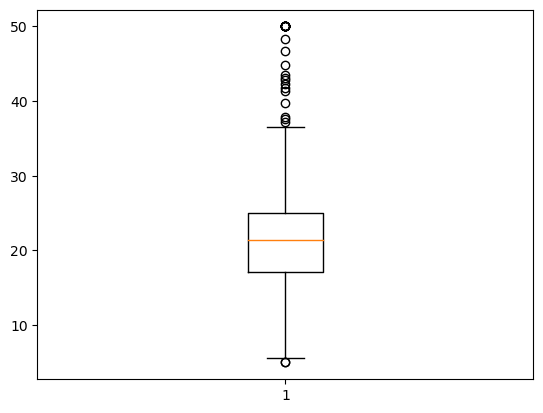

In [6]:
plt.boxplot(df['medv'])

We can see that median of the `MEDV` is near to ~24, but there a lot if data above Q3.

`Provide a  bar plot for the Charles river variable`

<BarContainer object of 2 artists>

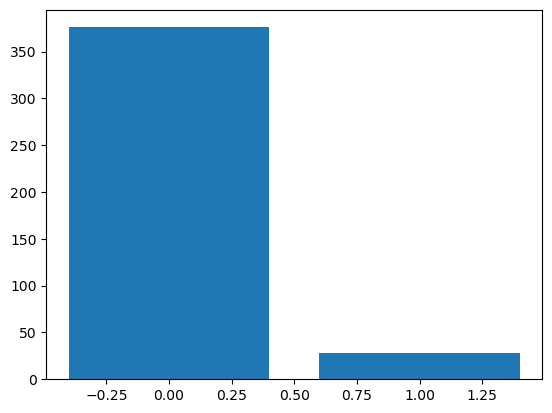

In [20]:
unique_values, counts = np.unique(df['chas'], return_counts=True)
plt.bar(unique_values, counts)

The bar plot shows for every unique value of column `chas` amount of repetitions

`Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)`

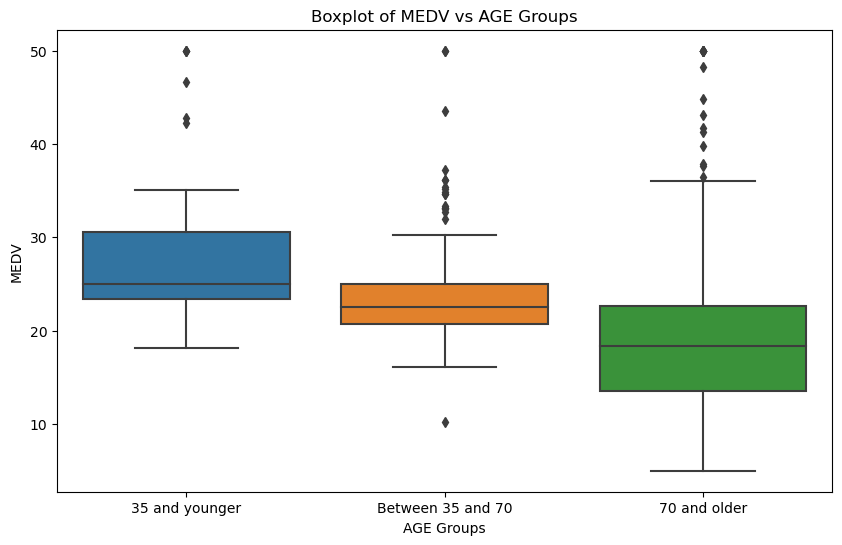

In [32]:
df['age_groups'] = pd.cut(df['age'], bins=[0, 35, 70, df['age'].max()], labels=['35 and younger', 'Between 35 and 70', '70 and older'])
# Построение боксплотов
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age_groups'], y=df['medv'])
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('AGE Groups')
plt.ylabel('MEDV')
plt.show()

How we can see, with higher age medv decreases

`Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?`

Text(0, 0.5, 'proportion of non-retail business acres per town')

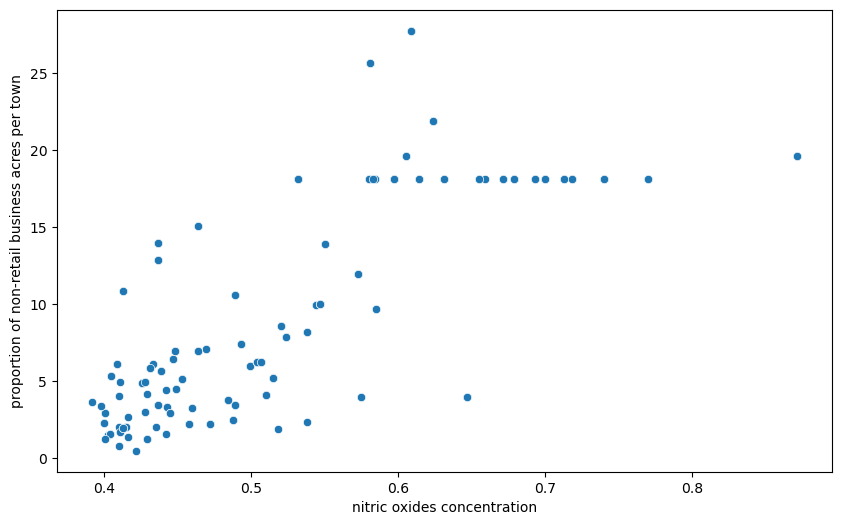

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['nox'], y=df['indus'])
plt.xlabel('nitric oxides concentration')
plt.ylabel('proportion of non-retail business acres per town')

We see correlation with increasing nox increases indus

`Create a histogram for the pupil to teacher ratio variable`

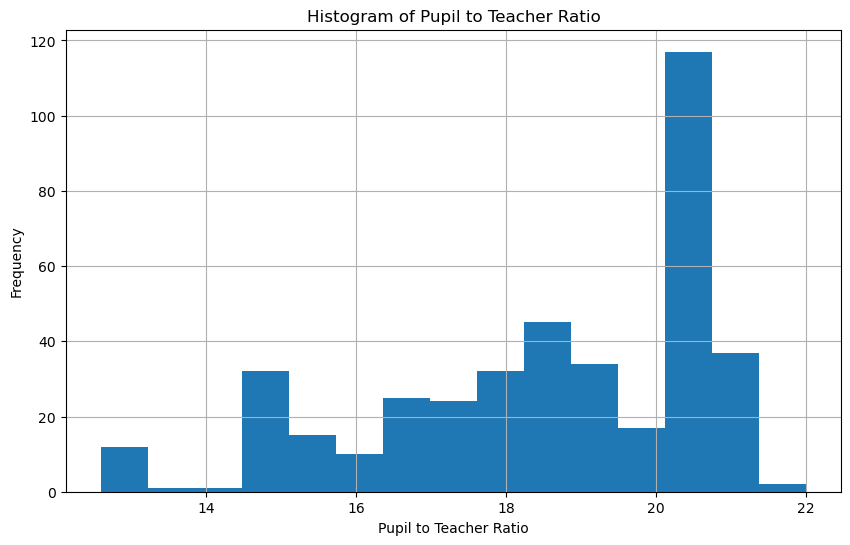

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(df['ptratio'], bins = 15)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

`Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)`

In [45]:
alpha = 0.05

In [50]:
t_stat, p_val = stats.ttest_ind(df[df['chas'] == 1]['medv'], df[df['chas'] == 0]['medv'])
print("T-Statistic:", t_stat)
print("P-Value:", p_val)
if p_val < alpha:
    print("There is significant difference")
else:
    print("There is no significant difference")

T-Statistic: 2.8638447045933133
P-Value: 0.00440463186567746
There is significant difference


Thx to t-test we define that there are no significant difference

`Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)`

In [55]:
gd = [df[df['age'] == age_group]['medv'] for age_group in df['age'].unique()]
f_stat, p_val = stats.f_oneway(*gd)

print("F-Statistic:", f_stat)
print("P-Value:", p_val)

if p_val < alpha:
    print("There is significant difference in medv")
else:
    print("There is no significant difference in medv")

F-Statistic: 1.1899261383634578
P-Value: 0.14806686767717853
There is no significant difference in medv


`Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)`

In [58]:
correlation_coefficient, p_value = stats.pearsonr(df['nox'], df['indus'])

print("Pearson coeff:", correlation_coefficient)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is significant difference between NOX and INDUS")
else:
    print("There is no significant difference between NOX and INDUS")

Pearson coeff: 0.7609129297893396
P-value: 1.58683676729532e-77
There is significant difference between NOX and INDUS


`What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)`

In [60]:
import statsmodels.api as sm
X = sm.add_constant(df['dis'])
model = sm.OLS(df['medv'], X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     30.33
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           6.51e-08
Time:                        19:48:43   Log-Likelihood:                -1438.4
No. Observations:                 404   AIC:                             2881.
Df Residuals:                     402   BIC:                             2889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0971      0.875     20.677      0.000      16.377      19.818
dis            1.1094      0.201      5.507      0.000       0.713       1.505
==============================================================================
Omnibus:                      117.972   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.146
Skew:                           1.474   Prob(JB):                     1.09e-60
Kurtosis:                       5.777   Cond. No.                         9.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""